## Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Data Dictionary

**Train file**: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

|Variable|	Description|
|----|------|
|Loan_ID|	Unique Loan ID|
|Gender|	Male/ Female|
|Married|	Applicant married (Y/N)|
|Dependents|	Number of dependents
|Education|	Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|	Self employed (Y/N)|
|ApplicantIncome|	Applicant income|
|CoapplicantIncome|	Coapplicant income|
|LoanAmount|	Loan amount in thousands|
|Loan_Amount_Term|	Term of loan in months|
|Credit_History|	credit history meets guidelines|
|Property_Area|	Urban/ Semi Urban/ Rural|
|Loan_Status|	(Target) Loan approved (Y/N)|


**Test file**: CSV containing the customer information for whom loan eligibility is to be predicted

|Variable|	Description|
|----|------|
|Loan_ID|	Unique Loan ID|
|Gender|	Male/ Female|
|Married|	Applicant married (Y/N)|
|Dependents|	Number of dependents|
|Education|	Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|	Self employed (Y/N)|
|ApplicantIncome|	Applicant income|
|CoapplicantIncome|	Coapplicant income|
|LoanAmount|	Loan amount in thousands|
|Loan_Amount_Term|	Term of loan in months|
|Credit_History|	credit history meets guidelines|
|Property_Area|	Urban/ Semi Urban/ Rural|

### Import Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df.Gender = df.Gender.fillna('Male')

In [10]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df.Married = df.Married.fillna('Yes')

In [12]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df.Dependents = df.Dependents.fillna('0')

In [14]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [17]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [19]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [25]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [26]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [27]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [30]:
# Splitting traing data
X = df.iloc[:, 1: 12].values
y = df.iloc[:, 12].values

In [33]:
X[:3]

array([['Male', 'No', '0', 'Graduate', 'No', 5849, 0.0,
        146.41216216216216, 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0,
        1.0, 'Rural'],
       ['Male', 'Yes', '0', 'Graduate', 'Yes', 3000, 0.0, 66.0, 360.0,
        1.0, 'Urban']], dtype=object)

In [32]:
y[:3]

array(['Y', 'N', 'Y'], dtype=object)

In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [35]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [38]:
for i in range(0, 5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

X_train[:,10] = labelencoder_X.fit_transform(X_train[:,10])

In [36]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [39]:
X_train[:3]

array([[1, 1, 3, 1, 1, 5703, 0.0, 130.0, 360.0, 1.0, 0],
       [1, 1, 0, 0, 1, 674, 5296.0, 168.0, 360.0, 1.0, 0],
       [1, 1, 3, 0, 0, 4106, 0.0, 40.0, 180.0, 1.0, 0]], dtype=object)

In [40]:
y_train[:3]

array([1, 1, 1])

In [41]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for i in range(0, 5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])
X_test[:,10] = labelencoder_X.fit_transform(X_test[:,10])
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [42]:
X_test[:3]

array([[1, 0, 0, 0, 1, 7085, 0.0, 84.0, 360.0, 1.0, 1],
       [0, 0, 0, 0, 0, 4230, 0.0, 112.0, 360.0, 1.0, 1],
       [1, 1, 0, 0, 0, 6133, 3906.0, 324.0, 360.0, 1.0, 2]], dtype=object)

In [45]:
y_test[:3]

array([1, 0, 1])

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [47]:
X_train[:3]

array([[ 0.45832213,  0.68260517,  2.15219873,  1.89618185,  2.4356115 ,
         0.03246645, -0.53731691, -0.2034265 ,  0.27573121,  0.42269889,
        -1.35480842],
       [ 0.45832213,  0.68260517, -0.78196554, -0.52737558,  2.4356115 ,
        -0.73983059,  1.24794339,  0.26361102,  0.27573121,  0.42269889,
        -1.35480842],
       [ 0.45832213,  0.68260517,  2.15219873, -0.52737558, -0.41057451,
        -0.21278278, -0.53731691, -1.309568  , -2.6662009 ,  0.42269889,
        -1.35480842]])

In [48]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [49]:
explained_variance

array([0.17780041, 0.15224774])

In [51]:
X_train.shape

(409, 2)

In [52]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [54]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.7073170731707317


In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


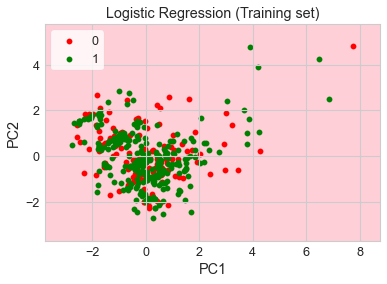

In [56]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression(random_state = 0)
dec = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
ran = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(random_state=0,kernel = 'linear')
naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive,
         "Logistic Regression": lr}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [62]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Naive bayes,0.712195
SVM,0.707317
Logistic Regression,0.707317
KNN,0.629268
Random forest,0.585366
Decision tree,0.536585
